In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data_directory = "data"

data_files = [
    "a05.txt",
    "a10.txt",
    "a17.txt",
    "a20.txt",
    "a22.txt",
    "e05.txt",
    "e10.txt",
    "e17.txt",
    "e20.txt",
    "e22.txt",
    "k05.txt",
    "k10.txt",
    "k17.txt",
    "k20.txt",
    "k22.txt",
    "w05.txt",
    "w10.txt",
    "w17.txt",
    "w20.txt",
    "w22.txt",
]

/var/folders/zq/9r42fx5j2tl523ydw54p0_jh0000gn/T/ipykernel_30611/2085271241.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


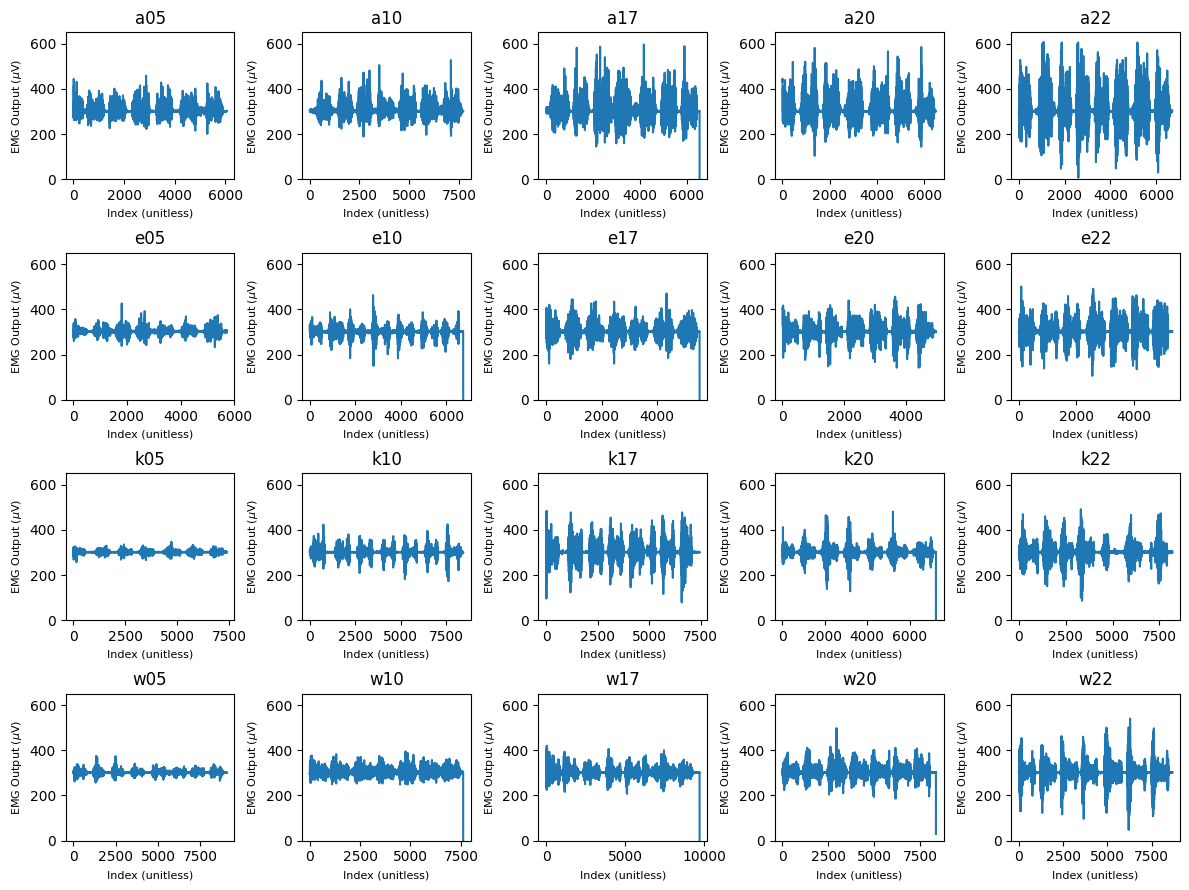

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(12, 9))
for ax, file in zip(axs.flatten(), data_files):
    position = np.loadtxt(os.path.join(data_directory, file))
    ax.set_title(file[:-4])
    ax.set_xlabel("Index (unitless)", fontsize=8)
    ax.set_ylabel("EMG Output ($\mu$V)", fontsize=8)
    ax.set_ylim((0, 650))
    ax.plot(position)
fig.tight_layout()
fig.subplots_adjust(wspace=0.4, hspace=0.5)
fig.savefig("output/alldata.png")
fig.show()

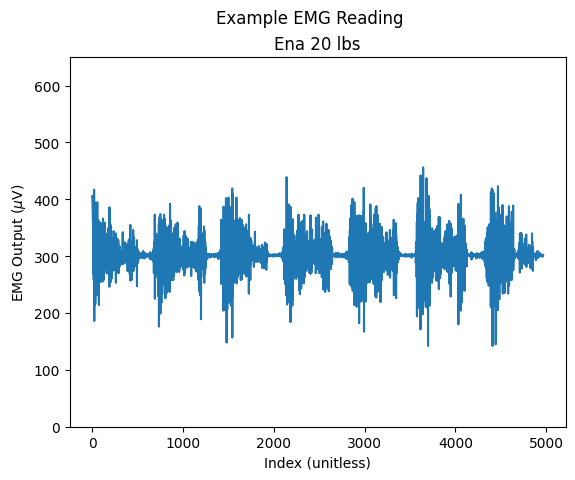

In [20]:
YMIN = 0
YMAX = 650

ax = plt.gca()
plt.suptitle("Example EMG Reading")
ax.set_title("Ena 20 lbs")
ax.set_xlabel("Index (unitless)")
ax.set_ylim((YMIN, YMAX))
ax.set_ylabel("EMG Output ($\mu$V)")

data = np.loadtxt("data/e20.txt")
plt.plot(data)
plt.savefig("output/e20data.png")
plt.show()

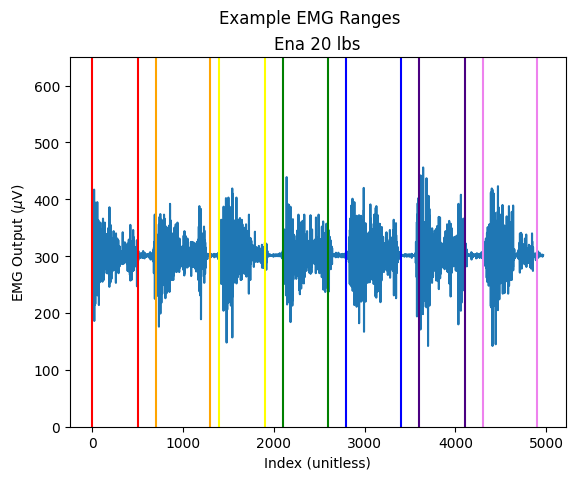

In [21]:
YMIN = 0
YMAX = 650

ax = plt.gca()
plt.suptitle("Example EMG Ranges")
ax.set_title("Ena 20 lbs")
ax.set_xlabel("Index (unitless)")
ax.set_ylim((YMIN, YMAX))
ax.set_ylabel("EMG Output ($\mu$V)")

data = np.loadtxt("data/e20.txt")
plt.plot(data)
plt.vlines([0, 500], YMIN, YMAX, colors="red")
plt.vlines([700, 1300], YMIN, YMAX, colors="orange")
plt.vlines([1400, 1900], YMIN, YMAX, colors="yellow")
plt.vlines([2100, 2600], YMIN, YMAX, colors="green")
plt.vlines([2800, 3400], YMIN, YMAX, colors="blue")
plt.vlines([3600, 4100], YMIN, YMAX, colors="indigo")
plt.vlines([4300, 4900], YMIN, YMAX, colors="violet")
plt.savefig("output/e20ranges.png")
plt.show()

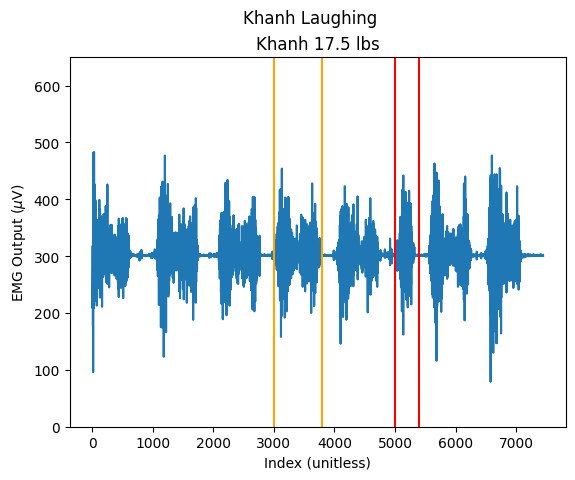

In [22]:
YMIN = 0
YMAX = 650

ax = plt.gca()
plt.suptitle("Khanh Laughing")
ax.set_title("Khanh 17.5 lbs")
ax.set_xlabel("Index (unitless)")
ax.set_ylim((YMIN, YMAX))
ax.set_ylabel("EMG Output ($\mu$V)")

data = np.loadtxt("data/k17.txt")
plt.plot(data)
plt.vlines([3000, 3800], YMIN, YMAX, colors="orange")
plt.vlines([5000, 5400], YMIN, YMAX, colors="red")
plt.savefig("output/k17data.png")
plt.show()

In [23]:
w_data_files = [
    "w05.txt",
    "w10.txt",
    "w17.txt",
    "w20.txt",
    "w22.txt",
]

w_ranges = [
    # w05
    (0, 900),
    (1000, 2000),
    (2100, 3100),
    (3300, 4300),
    (4500, 5500),
    (5700, 6700),
    (6900, 7700),
    # w10
    (0, 900),
    (1000, 2000),
    (2100, 3100),
    (3200, 4200),
    (4300, 5300),
    (5400, 6400),
    (6500, 7500),
    # w17
    (0, 800),
    (1000, 1900),
    (2300, 3300),
    (3700, 4800),
    (4900, 6000),
    (6100, 7000),
    (7200, 8200),
    # w20
    (0, 600),
    (1200, 2000),
    (2500, 3500),
    (3700, 4300),
    (4800, 5900),
    (6000, 7000),
    (7100, 8100),
    # w22
    (0, 800),
    (1100, 2100),
    (2300, 3000),
    (3500, 4000),
    (4700, 5500),
    (6000, 6500),
    (7500, 8500),
]

In [24]:
k_data_files = [
    "k05.txt",
    "k10.txt",
    "k17.txt",
    "k20.txt",
    "k22.txt",
]

k_ranges = [
    # k05
    (0, 600),
    (1100, 1800),
    (2150, 2850),
    (3200, 3900),
    (4300, 5200),
    (5450, 6250),
    (6600, 7300),
    # k10
    (0, 850),
    (1400, 2200),
    (2600, 3450),
    (3900, 4700),
    (5100, 5900),
    (6300, 7100),
    (7400, 8400),
    # k17
    (0, 600),
    (1050, 1800),
    (2050, 2800),
    (3000, 3750),
    (4000, 4750),
    (5500, 6250),
    (6500, 7100),
    # k20
    (0, 600),
    (800, 1500),
    (1800, 2600),
    (2900, 3600),
    (3900, 4700),
    (5000, 5900),
    (6200, 7100),
    # k22
    (0, 1000),
    (1200, 2000),
    (2150, 2900),
    (3000, 4000),
    (4300, 4900),
    (5600, 6600),
    (6900, 7900),
]

In [25]:
e_data_files = [
    "e05.txt",
    "e10.txt",
    "e17.txt",
    "e20.txt",
    "e22.txt",
]

e_ranges = [
    # e05
    (0, 500),
    (800, 1300),
    (1600, 2100),
    (2300, 2800),
    (3200, 3700),
    (4000, 4600),
    (5000, 5500),
    # e10
    (0, 500),
    (800, 1500),
    (1700, 2400),
    (2700, 3500),
    (3800, 4600),
    (4800, 5700),
    (5800, 6700),
    # e17
    (0, 500),
    (700, 1300),
    (1400, 2100),
    (2300, 2800),
    (3000, 3700),
    (3900, 4600),
    (4800, 5400),
    # e20
    (0, 500),
    (700, 1300),
    (1400, 1900),
    (2100, 2600),
    (2800, 3400),
    (3600, 4100),
    (4300, 4900),
    # e22
    (0, 500),
    (800, 1400),
    (1600, 2100),
    (2300, 3000),
    (3200, 3800),
    (3900, 4550),
    (4650, 5200),
]

In [26]:
a_data_files = [
    "a05.txt",
    "a10.txt",
    "a17.txt",
    "a20.txt",
    "a22.txt",
]

a_ranges = [
    # a05
    (0, 440),
    (480, 1250),
    (1400, 2100),
    (2300, 3000),
    (3300, 3900),
    (4200, 5000),
    (5200, 5900),
    # a10
    (400, 1200),
    (1400, 2200),
    (2400, 3200),
    (3400, 4200),
    (4500, 5300),
    (5600, 6500),
    (6700, 7800),
    # a17
    (200, 920),
    (1100, 1800),
    (2100, 2800),
    (2900, 3600),
    (4000, 4700),
    (4900, 5600),
    (5800, 6400),
    # a20
    (0, 500),
    (700, 1500),
    (1700, 2500),
    (2600, 3400),
    (3700, 4500),
    (4700, 5400),
    (5600, 6500),
    # a22
    (0, 500),
    (700, 1600),
    (1700, 2300),
    (2500, 3100),
    (3300, 3900),
    (4200, 4800),
    (5000, 5700),
]

In [27]:
def plot_central_tendencies(ax, ranges, data_files, name):
    range_it = iter(ranges)
    mean_maximums = []
    median_maximums = []
    for file in data_files:
        position = np.loadtxt(os.path.join(data_directory, file))
        maximums = []
        for _ in range(7):
            i_left, i_right = next(range_it)
            maximums.append(np.max(position[i_left:i_right]))
        mean_maximums.append(np.mean(maximums))
        median_maximums.append(np.median(maximums))

    weights = np.array([5, 10, 17.5, 20, 22.5])

    weights_err = np.ones(5) * 0.1
    mean_err = np.ones(5) * (0.1 * np.sqrt(5))
    median_err = np.ones(5) * 1

    coeffs_mean, cov_mean = np.polyfit(weights, mean_maximums, 1, cov=True)
    print(f"Mean line of best fit: {name}")
    print(f"slope =\t{coeffs_mean[0]}")
    print(f"del_s =\t {np.sqrt(cov_mean[0][0])}")
    print(f"inter =\t{coeffs_mean[1]}")
    print(f"del_i =\t {np.sqrt(cov_mean[1][1])}")

    coeffs_median, cov_median = np.polyfit(weights, median_maximums, 1, cov=True)
    print(f"Median line of best fit: {name}")
    print(f"slope =\t{coeffs_median[0]}")
    print(f"del_s =\t {np.sqrt(cov_median[0][0])}")
    print(f"inter =\t{coeffs_median[1]}")
    print(f"del_i =\t {np.sqrt(cov_median[1][1])}")

    weight_dummy = np.linspace(5, 22.5, 100)
    maximum_mean_dummy = coeffs_mean[0] * weight_dummy + coeffs_mean[1]
    median_mean_dummy = coeffs_median[0] * weight_dummy + coeffs_median[1]

    ax.set_title(f"EMG Output on Ranges: {name}")
    ax.set_xlabel("Weight (lbs)")
    ax.set_ylim((300, 650))
    ax.set_ylabel("EMG Output ($\mu$V)")
    ax.errorbar(weights, mean_maximums, xerr=weights_err, yerr=mean_err, label="mean", fmt="o")
    ax.plot(weight_dummy, maximum_mean_dummy, label="mean line of best fit", color="green")
    ax.errorbar(weights, median_maximums, xerr=weights_err, yerr=median_err, label="median", fmt="o")
    ax.plot(weight_dummy, median_mean_dummy, label="median line of best fit", color="purple")
    ax.legend()

In [28]:
def plot_maximums(ax, ranges, data_files, name):
    range_it = iter(ranges)
    maximums = []
    for file in data_files:
        position = np.loadtxt(os.path.join(data_directory, file))
        for _ in range(7):
            i_left, i_right = next(range_it)
            maximums.append(np.max(position[i_left:i_right]))

    weight_lifted = [5, 10, 17.5, 20, 22.5]
    weights_dup = []
    for w in weight_lifted:
        for _ in range(7):
            weights_dup.append(w)
    weights = np.array(weights_dup)

    weights_err = np.ones(np.shape(weights)) * 0.1
    maximums_err = np.ones(np.shape(maximums)) * 1

    coeffs, cov = np.polyfit(weights, maximums, 1, cov=True)
    print(f"Line of best fit: {name}")
    print(f"slope =\t{coeffs[0]}")
    print(f"del_s =\t {np.sqrt(cov[0][0])}")
    print(f"inter =\t{coeffs[1]}")
    print(f"del_i =\t {np.sqrt(cov[1][1])}")

    weight_dummy = np.linspace(5, 22.5, 100)
    maximum_dummy = coeffs[0] * weight_dummy + coeffs[1]

    ax.set_title(f"EMG Output on Ranges: {name}")
    ax.set_xlabel("Weight (lbs)")
    ax.set_ylim((300, 650))
    ax.set_ylabel("EMG Output ($\mu$V)")
    ax.errorbar(weights, maximums, xerr=weights_err, yerr=maximums_err, label="data", fmt="o")
    ax.plot(weight_dummy, maximum_dummy, label="line of best fit", color="orange")
    ax.legend()

In [29]:
def plot_loglog(ax, ranges, data_files, max_intercept, name):
    range_it = iter(ranges)
    maximums = []
    for file in data_files:
        position = np.loadtxt(os.path.join(data_directory, file))
        for _ in range(7):
            i_left, i_right = next(range_it)
            maximums.append(np.max(position[i_left:i_right]))

    max_arr = np.array(maximums) - max_intercept
    ind = max_arr > 0
    pos_arr = max_arr[ind]
    log_maximums = np.log(pos_arr / pos_arr[0])

    weight_lifted = [5, 10, 17.5, 20, 22.5]
    weights_dup = []
    for w in weight_lifted:
        for _ in range(7):
            weights_dup.append(w)
    weights = np.array(weights_dup)

    pos_weights = weights[ind]
    log_weights = np.log(pos_weights / pos_weights[0])

    coeffs, cov = np.polyfit(log_weights, log_maximums, 1, cov=True)
    print(f"Line of best fit: {name}")
    print(f"slope =\t{coeffs[0]}")
    print(f"del_s =\t {np.sqrt(cov[0][0])}")
    print(f"inter =\t{coeffs[1]}")
    print(f"del_i =\t {np.sqrt(cov[1][1])}")

    CMIN = -2
    CMAX = 3.5
    log_weight_dummy = np.linspace(CMIN, CMAX, 100)
    log_maximum_dummy = coeffs[0] * log_weight_dummy + coeffs[1]

    ax.set_title(f"Log-Log EMG Output on Ranges: {name}")
    ax.set_xlabel("Log Weight Ratio (unitless)")
    ax.set_xlim([CMIN, CMAX])
    ax.set_ylabel("Log EMG Output Ratio (unitless)")
    ax.set_ylim([CMIN, CMAX])
    ax.scatter(log_weights, log_maximums, label="log-log")
    ax.plot(log_weight_dummy, log_maximum_dummy, label="line of best fit", color="orange")
    ax.legend()

Mean line of best fit: Angel
slope =	8.74117647058823
del_s =	 0.7364944184682606
inter =	380.168067226891
del_i =	 12.045680869354628
Median line of best fit: Angel
slope =	10.011764705882344
del_s =	 1.8240960536435868
inter =	374.2235294117649
del_i =	 29.83387027282236
Mean line of best fit: Ena
slope =	4.393277310924366
del_s =	 0.7636044642926241
inter =	351.21512605042017
del_i =	 12.489077251139884
Median line of best fit: Ena
slope =	4.717647058823523
del_s =	 0.8725521039822111
inter =	343.0352941176471
del_i =	 14.270962444376762
Mean line of best fit: Khanh
slope =	6.588235294117639
del_s =	 1.6494776727770915
inter =	313.80504201680696
del_i =	 26.977912050877094
Median line of best fit: Khanh
slope =	7.070588235294119
del_s =	 1.9666398840863981
inter =	304.34117647058804
del_i =	 32.165235519256335
Mean line of best fit: Eric
slope =	6.003361344537815
del_s =	 1.7417104401699708
inter =	310.9781512605041
del_i =	 28.486418366542974
Median line of best fit: Eric
slope =	5

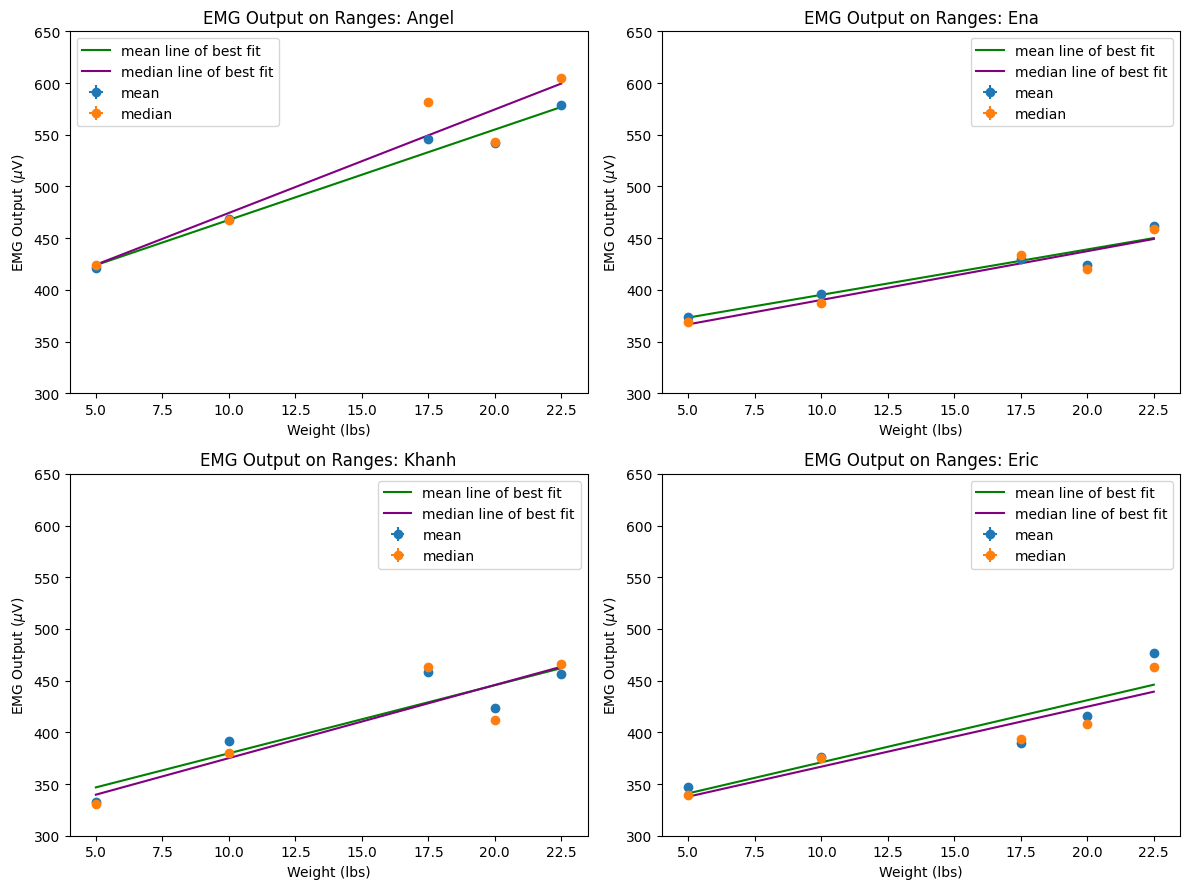

In [30]:
fig, ((ax_a, ax_e), (ax_k, ax_w)) = plt.subplots(2, 2, figsize=(12, 9))
plot_central_tendencies(ax_a, a_ranges, a_data_files, "Angel")
plot_central_tendencies(ax_e, e_ranges, e_data_files, "Ena")
plot_central_tendencies(ax_k, k_ranges, k_data_files, "Khanh")
plot_central_tendencies(ax_w, w_ranges, w_data_files, "Eric")
fig.tight_layout()
plt.savefig("output/allrangecentral.png")
plt.show()

Line of best fit: Angel
slope =	8.741176470588222
del_s =	 0.9873350869592399
inter =	380.1680672268909
del_i =	 16.148287170135614
Line of best fit: Ena
slope =	4.393277310924358
del_s =	 0.6836066612708563
inter =	351.21512605042005
del_i =	 11.180679004953806
Line of best fit: Khanh
slope =	6.588235294117641
del_s =	 0.8769865939937097
inter =	313.8050420168067
del_i =	 14.343490423078824
Line of best fit: Eric
slope =	6.003361344537806
del_s =	 0.8624581520902503
inter =	310.9781512605042
del_i =	 14.105871548706359


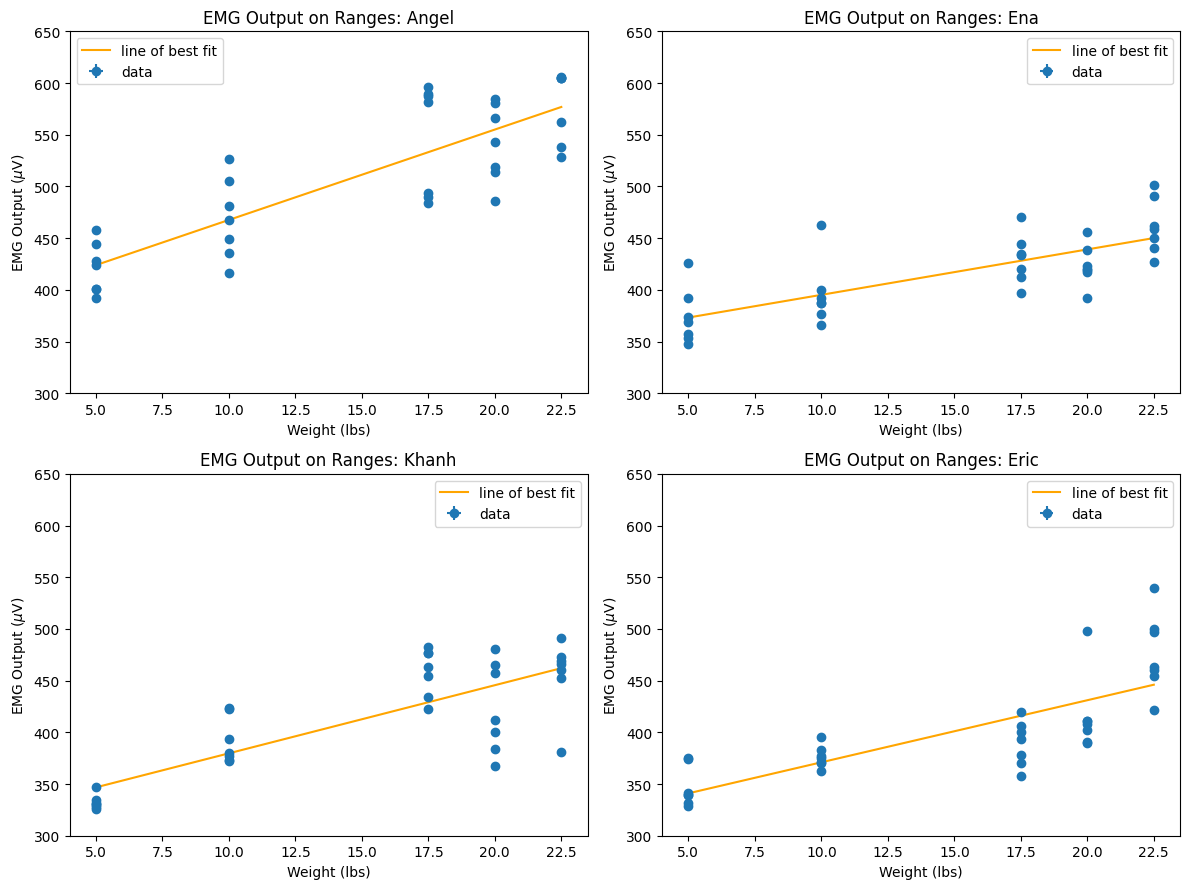

In [31]:
fig, ((ax_a, ax_e), (ax_k, ax_w)) = plt.subplots(2, 2, figsize=(12, 9))
plot_maximums(ax_a, a_ranges, a_data_files, "Angel")
plot_maximums(ax_e, e_ranges, e_data_files, "Ena")
plot_maximums(ax_k, k_ranges, k_data_files, "Khanh")
plot_maximums(ax_w, w_ranges, w_data_files, "Eric")
fig.tight_layout()
plt.savefig("output/allrangedata.png")
plt.show()

Line of best fit: Angel
slope =	1.144668940102628
del_s =	 0.12561487717975794
inter =	-0.5996445344860472
del_i =	 0.1402610221978908
Line of best fit: Ena
slope =	1.216235951522373
del_s =	 0.2044489328374027
inter =	0.9917905064354346
del_i =	 0.23161961385742127
Line of best fit: Khanh
slope =	1.2949151770294742
del_s =	 0.1187207208196429
inter =	0.5913683422968101
del_i =	 0.13256303737338587
Line of best fit: Eric
slope =	0.8974560341604535
del_s =	 0.10680838032812581
inter =	0.13205717849720516
del_i =	 0.11926177010614569


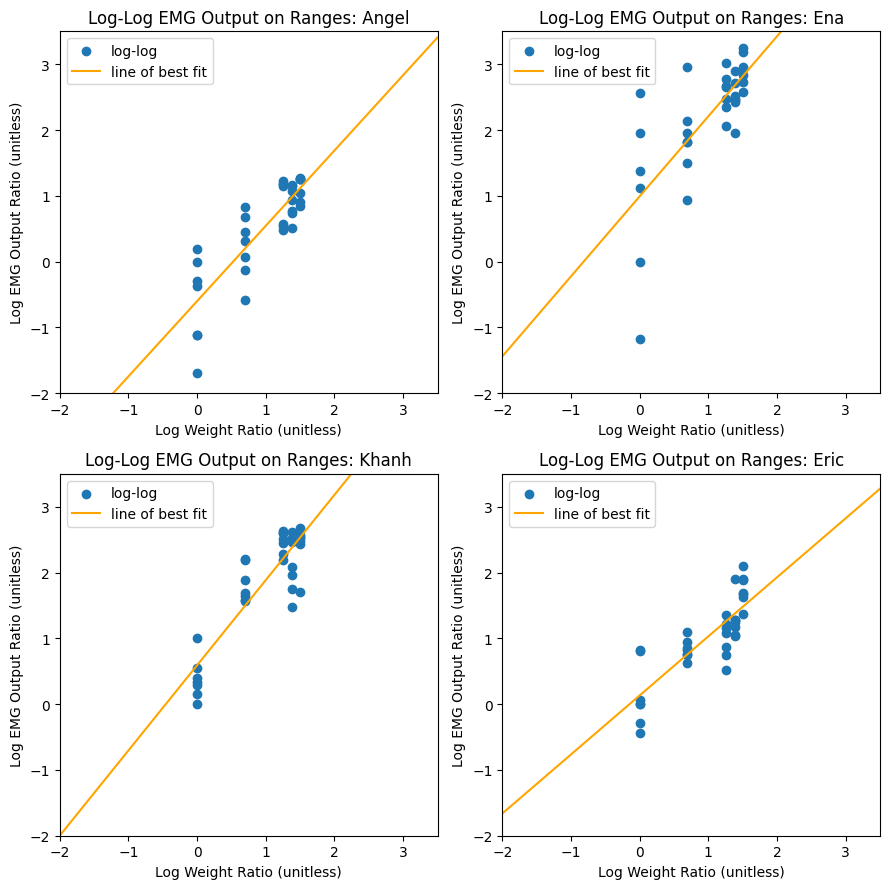

In [32]:
fig, ((ax_a, ax_e), (ax_k, ax_w)) = plt.subplots(2, 2, figsize=(9, 9))
plot_loglog(ax_a, a_ranges, a_data_files, 380.1680672268909, "Angel")
plot_loglog(ax_e, e_ranges, e_data_files, 351.21512605042005, "Ena")
plot_loglog(ax_k, k_ranges, k_data_files, 313.8050420168067, "Khanh")
plot_loglog(ax_w, w_ranges, w_data_files, 310.9781512605042, "Eric")
fig.tight_layout()
plt.savefig("output/allrangeloglog.png")
plt.show()